# Supervised Learning - Building a Student Performace Prediction System


# Classification vs. Regression
The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?
Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

# Logistic Regression

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance

# Question 1 - Exploring the Data (0.5 points)
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [606]:
##Import the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [607]:
data=pd.read_csv('students-data.csv',delimiter = ';')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Question 2 - drop missing values (0.5 points)
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*
*Use .dropna() function to drop the NAs*

#### Answer:

In [608]:
data.index.names = ['number']
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [609]:
data.isnull()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [610]:
data.isnull().sum().sum()

0

In [611]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

# There is no missing values in the dataset

# Transform Data

## Question 3 (0.5 points)

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [612]:
data.shape

(395, 33)

In [613]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [614]:
#data.select_dtypes(include='object',exclude='int64')
#data.head()

# Question 4 - Drop variables with less variance (0.5 points)

*Find the variance of each numerical independent variable and drop whose variance is less than 1. Use .var function to check the variance*

In [615]:
data.var()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [616]:
data=data.drop(['traveltime','studytime','failures','famrel','freetime','Dalc',],axis=1)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,3,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,2,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,2,2,5,4,6,10,10


In [617]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'goout',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [618]:
data.shape

(395, 27)

#### Variables with less variance are almost same for all the records. Hence, they do not contribute much for classification.

# Question 6 - Encode all categorical variables to numerical (0.5 points)

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [619]:
from sklearn.preprocessing import LabelEncoder

In [620]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
goout          int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [621]:
data1=data.select_dtypes(exclude=['int64'])
data1.head()
data1.columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [622]:
labelencoder = LabelEncoder()
data1 = data1.apply(labelencoder.fit_transform)
data1.head()


,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,4,0,1,1,0,0,0,1,1,0,0
1,0,0,1,0,1,0,2,0,0,0,1,0,0,0,1,1,0
2,0,0,1,1,1,0,2,2,1,1,0,1,0,1,1,1,0
3,0,0,1,0,1,1,3,1,1,0,1,1,1,1,1,1,1
4,0,0,1,0,1,2,2,1,0,0,1,1,0,1,1,0,0


In [623]:
print(data.columns)
data2=data.select_dtypes(include=['int64'])
data2.head()



Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'goout',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


,age,Medu,Fedu,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,
0,18,4,4,4,1,3,6,5,6,6
1,17,1,1,3,1,3,4,5,5,6
2,15,1,1,2,3,3,10,7,8,10
3,15,4,2,2,1,5,2,15,14,15
4,16,3,3,2,2,5,4,6,10,10


In [624]:
dataf=data1.join(data2,how='outer')
dataf.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,...,age,Medu,Fedu,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,4,0,1,1,...,18,4,4,4,1,3,6,5,6,6
1,0,0,1,0,1,0,2,0,0,0,...,17,1,1,3,1,3,4,5,5,6
2,0,0,1,1,1,0,2,2,1,1,...,15,1,1,2,3,3,10,7,8,10
3,0,0,1,0,1,1,3,1,1,0,...,15,4,2,2,1,5,2,15,14,15
4,0,0,1,0,1,2,2,1,0,0,...,16,3,3,2,2,5,4,6,10,10


# Question 7 - Convert the continuous values of grades into classes (1 point)

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [625]:
dataf['G1']=np.where(dataf['G1']>=10,1,0)
dataf.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,...,age,Medu,Fedu,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,4,0,1,1,...,18,4,4,4,1,3,6,0,6,6
1,0,0,1,0,1,0,2,0,0,0,...,17,1,1,3,1,3,4,0,5,6
2,0,0,1,1,1,0,2,2,1,1,...,15,1,1,2,3,3,10,0,8,10
3,0,0,1,0,1,1,3,1,1,0,...,15,4,2,2,1,5,2,1,14,15
4,0,0,1,0,1,2,2,1,0,0,...,16,3,3,2,2,5,4,0,10,10


In [626]:
dataf['G2']=np.where(dataf['G2']>=10,1,0)
dataf.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,...,age,Medu,Fedu,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,4,0,1,1,...,18,4,4,4,1,3,6,0,0,6
1,0,0,1,0,1,0,2,0,0,0,...,17,1,1,3,1,3,4,0,0,6
2,0,0,1,1,1,0,2,2,1,1,...,15,1,1,2,3,3,10,0,0,10
3,0,0,1,0,1,1,3,1,1,0,...,15,4,2,2,1,5,2,1,1,15
4,0,0,1,0,1,2,2,1,0,0,...,16,3,3,2,2,5,4,0,1,10


In [627]:
dataf['G3']=np.where(dataf['G3']>=10,1,0)
dataf.head()


,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,...,age,Medu,Fedu,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,4,0,1,1,...,18,4,4,4,1,3,6,0,0,0
1,0,0,1,0,1,0,2,0,0,0,...,17,1,1,3,1,3,4,0,0,0
2,0,0,1,1,1,0,2,2,1,1,...,15,1,1,2,3,3,10,0,0,1
3,0,0,1,0,1,1,3,1,1,0,...,15,4,2,2,1,5,2,1,1,1
4,0,0,1,0,1,2,2,1,0,0,...,16,3,3,2,2,5,4,0,1,1


# Question 8 (0.5 points)

*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate feature and target attributes into separate dataframes with X and y variable names.*

In [539]:
#dataf=dataf.values # convert the data frame to a numpy array
#print(type(dataf))
#print(dataf)

<class 'numpy.ndarray'>
[[0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 1]
 ...
 [1 1 0 ... 1 0 0]
 [1 1 0 ... 1 1 1]
 [1 1 1 ... 0 0 0]]


In [540]:
#print(dataf.shape)
#dataf=dataf[:,1:]
#print(dataf.shape)

(395, 27)
(395, 26)


In [633]:
#remove the features and target
X_data=dataf.iloc[:,0:26]# from first column to all , with all rows 
Y_data=dataf.iloc[:,25]# First column, with all rows

In [634]:
print(X_data.shape)
print(X_data)

(395, 26)
        school  sex  address  famsize  Pstatus  Mjob  Fjob  reason  guardian  \
number                                                                         
0            0    0        1        0        0     0     4       0         1   
1            0    0        1        0        1     0     2       0         0   
2            0    0        1        1        1     0     2       2         1   
3            0    0        1        0        1     1     3       1         1   
4            0    0        1        0        1     2     2       1         0   
5            0    1        1        1        1     3     2       3         1   
6            0    1        1        1        1     2     2       1         1   
7            0    0        1        0        0     2     4       1         1   
8            0    1        1        1        0     3     2       1         1   
9            0    1        1        0        1     2     2       1         1   
10           0    0        1  

In [635]:
print(Y_data.shape)
print(Y_data)

(395,)
number
0      0
1      0
2      0
3      1
4      1
5      1
6      1
7      0
8      1
9      1
10     0
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     0
19     1
20     1
21     1
22     1
23     1
24     0
25     0
26     1
27     1
28     1
29     1
      ..
365    1
366    1
367    0
368    1
369    1
370    0
371    1
372    1
373    0
374    1
375    0
376    1
377    0
378    1
379    1
380    1
381    0
382    1
383    0
384    0
385    0
386    0
387    0
388    0
389    0
390    0
391    1
392    0
393    1
394    0
Name: G2, Length: 395, dtype: int32


# Question 9 - Training and testing data split (0.5 points)

# *So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [636]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.24)

In [637]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(300, 26)
(300,)
(95, 26)
(95,)


# Question 10 - Model Implementation and Testing the Accuracy (0.5 points)

*Build a **LogisticRegression** classifier using **fit()** functions in sklearn. 
* You need to import both Logistic regression and accuracy score from sklearn*
#### Answer:

In [638]:
from sklearn.linear_model import LogisticRegression

In [639]:
log_reg=LogisticRegression()

In [640]:
lm=log_reg.fit(X_train,y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [641]:
log_reg.score(X_train,y_train)

1.0

In [642]:
log_reg.score(X_test,y_test)

1.0

# Question 11 - Print the intercept of the Logistic regression model (0.5 points)

The value of the intercepts are stored in the model itself. You can use .intercept_ function to do the same

In [643]:
log_reg.intercept_

array([-0.0572316])

# Question 12 - Print the coefficients of the model (0.5 points) and name the coefficient which has the highest impact on the dependent variable (0.5 points)

Hint: Use .coef_ to get the coefficients and use pd.Dataframe to store the coefficients in a dataframe with column names same as the independent variable dataframe

In [644]:
coefs=log_reg.coef_
coefs

array([[ 0.16301536,  0.25512476,  0.21521093,  0.26865366, -0.08517305,
        -0.12860888, -0.01264647,  0.06202949, -0.13279792, -0.15669452,
        -0.08872766,  0.06890481,  0.02409285, -0.15807751,  0.12032041,
         0.1640187 , -0.23646434, -0.16963965,  0.09559928,  0.06353679,
        -0.18255995, -0.08261456,  0.01187662, -0.0158286 ,  1.43903663,
         5.51339022]])

In [645]:
coefs_df=pd.DataFrame(coefs,columns=dataf.columns[0:-1])

In [646]:
coefs_df.T

,0
school,0.163015
sex,0.255125
address,0.215211
famsize,0.268654
Pstatus,-0.085173
Mjob,-0.128609
Fjob,-0.012646
reason,0.062029
guardian,-0.132798
schoolsup,-0.156695


# G2 has highest impact on the dependent variable

# Question 13 - Predict the dependent variable for both training and test dataset (0.5 points)

Accuracy score() should help you to print the accuracies

In [647]:
log_reg.predict(X_test)

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1])

In [648]:
log_reg.predict(X_train)

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1])

In [649]:
log_reg.score(X_test,y_test)

1.0

In [650]:
log_reg.score(X_train,y_train)

1.0

# Information about the dataset

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

Attribute Information
1. ID - ID number of the image
2. Clump Thickness - 1 to 10
3. Cell Size - 1 to 10
4. Cell Shape - 1 to 10
5. Marginal Adhesion - 1 to 10
6. Single Epethelial cell size - 1 to 10
7. Bare nuclei - 1 to 10 
8. Normal Nucleoli - 1 to 10
9. Bland Chromatin - 1 to 10
10. Mitosis - 1 to 10
 
Class - Dependent Variable - 2 for benign 4 for malignant

### Read the data given in bc2.csv file

In [651]:
data_new=pd.read_csv('bc2.csv')
data_new.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### Observe the no.of records in dataset and type of each feature 

In [652]:
data_new.isnull().head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [653]:
data_new.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

### Use summary statistics to check if missing values, outlier and encoding treament is necessary


In [654]:
data_new.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


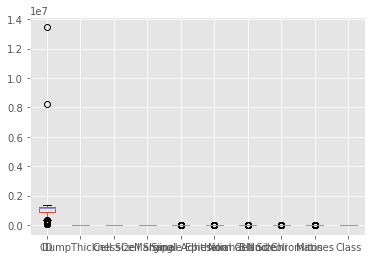

In [655]:
data_new.plot.box(grid='True')

### Check Missing Values

In [656]:
data_new.isnull().sum().sum()

0

### Check how many `?` there in Bare Nuclei feature (they are also unknown or missing values). Replace them with the top value of the describe function of Bare Nuclei feature.

#### Check include='all' parameter in describe function

In [657]:
np.where(data_new['Bare Nuclei']=='?')

(array([ 23,  40, 139, 145, 158, 164, 235, 249, 275, 292, 294, 297, 315,
        321, 411, 617], dtype=int64),)

In [658]:
len(data_new.iloc[np.where(data_new['Bare Nuclei']=='?')])

16

In [659]:
data_new.iloc[[ 23,  40, 139, 145, 158, 164, 235, 249, 275, 292, 294, 297, 315,
        321, 411, 617],6]

23     ?
40     ?
139    ?
145    ?
158    ?
164    ?
235    ?
249    ?
275    ?
292    ?
294    ?
297    ?
315    ?
321    ?
411    ?
617    ?
Name: Bare Nuclei, dtype: object

In [660]:
np.max(np.where(data_new['Bare Nuclei']!='?'))

698

In [661]:
data_new.iloc[[ 23,  40, 139, 145, 158, 164, 235, 249, 275, 292, 294, 297, 315,
        321, 411, 617],6]=698
data_new['Bare Nuclei']

0        1
1       10
2        2
3        4
4        1
5       10
6       10
7        1
8        1
9        1
10       1
11       1
12       3
13       3
14       9
15       1
16       1
17       1
18      10
19       1
20      10
21       7
22       1
23     698
24       1
25       7
26       1
27       1
28       1
29       1
      ... 
669      5
670      8
671      1
672      1
673      1
674      1
675      1
676      1
677      1
678      1
679      1
680     10
681     10
682      1
683      1
684      1
685      1
686      1
687      1
688      1
689      1
690      1
691      5
692      1
693      1
694      2
695      1
696      3
697      4
698      5
Name: Bare Nuclei, Length: 699, dtype: object

### Print and plot the distribution of target variable (Class - using Histogram) 

In [662]:
import matplotlib.pyplot as plt
import seaborn as sns

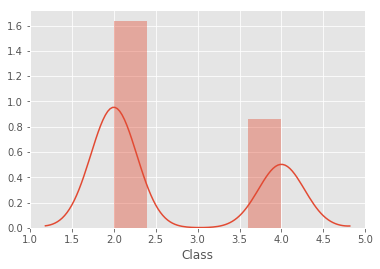

In [663]:
sns.distplot(data_new['Class'])

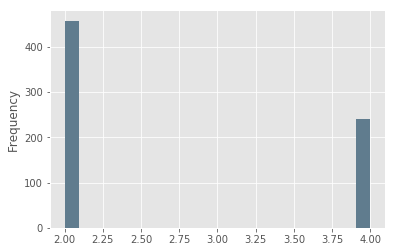

In [664]:
data_new['Class'].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')

### convert the datatype of Bare Nuclei to `int`

In [665]:
data_new['Bare Nuclei']= data_new['Bare Nuclei'].astype('int64')

### Standardization of Data (Use Standard Scaler)

In [666]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data_new_std=sc.fit_transform(data_new)
data_new_std

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.11623873,  0.20693572, -0.69999505, ..., -0.61182504,
        -0.34391178, -0.72539705],
       [-0.1115035 ,  0.20693572,  0.28384518, ..., -0.28411186,
        -0.34391178, -0.72539705],
       [-0.09126525, -0.50386559, -0.69999505, ..., -0.61182504,
        -0.34391178, -0.72539705],
       ...,
       [-0.29657482,  0.20693572,  2.25152563, ...,  2.33759359,
         0.23956962,  1.37855538],
       [-0.28254589, -0.14846494,  1.59563215, ...,  1.02674087,
        -0.34391178,  1.37855538],
       [-0.28254589, -0.14846494,  1.59563215, ...,  0.37131451,
        -0.34391178,  1.37855538]])

In [667]:
data_new_std=pd.DataFrame(data_new_std,columns=data_new.columns)
data_new_std.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,-0.116239,0.206936,-0.699995,-0.743299,-0.633247,-0.549561,-0.177451,-0.179662,-0.611825,-0.343912,-0.725397
1,-0.111504,0.206936,0.283845,0.266875,0.768621,1.710106,-0.090845,-0.179662,-0.284112,-0.343912,-0.725397
2,-0.091265,-0.503866,-0.699995,-0.743299,-0.633247,-0.549561,-0.167828,-0.179662,-0.611825,-0.343912,-0.725397
3,-0.089884,0.562336,1.595632,1.613773,-0.633247,-0.097628,-0.148582,-0.179662,1.354454,-0.343912,-0.725397
4,-0.088674,-0.148465,-0.699995,-0.743299,0.067687,-0.549561,-0.177451,-0.179662,-0.611825,-0.343912,-0.725397


### Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them. (Use pd.scatter matrix())

In [668]:
from sklearn import datasets
%matplotlib inline

plt.style.use('ggplot')

In [669]:
import pandas
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000055B68BD30>,
      dtype=object)

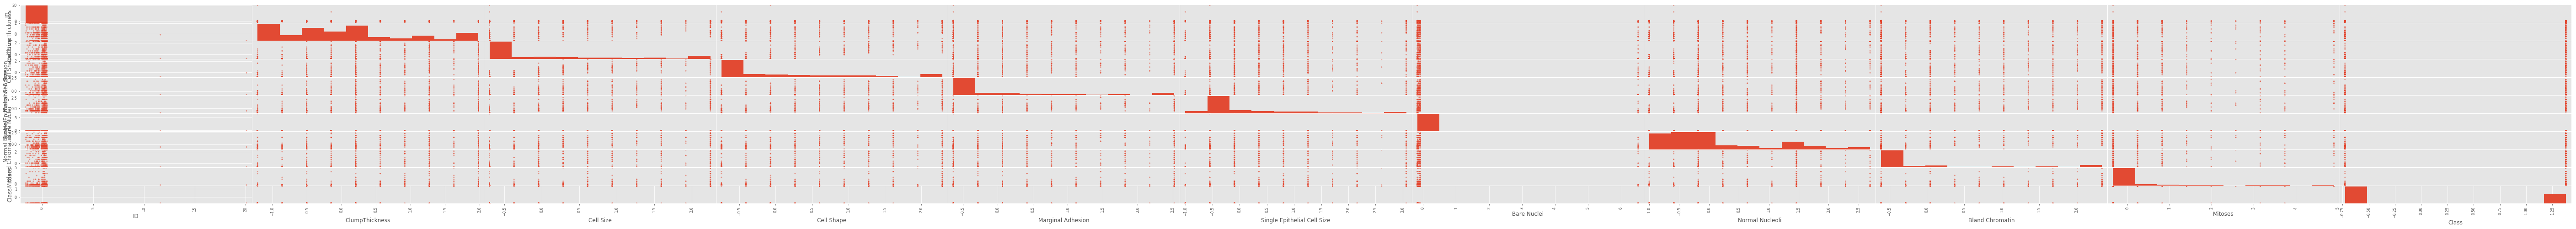

In [670]:
scatter_matrix(data_new_std,figsize=(100,8))

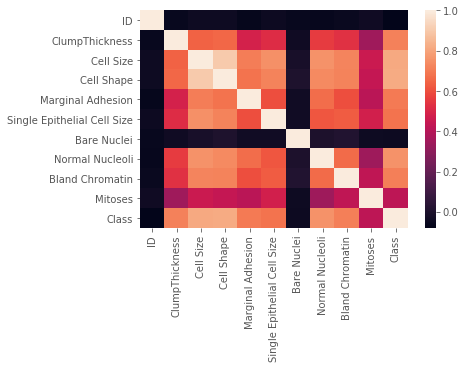

In [671]:
sns.heatmap(data_new.corr())

### Divide the dataset into feature set and target set

In [672]:
data_new_std.shape

(699, 11)

In [673]:
#remove the features and target
X1_data=data_new_std.iloc[:,0:10]# from first column to all , with all rows 
Y1_data=data_new_std.iloc[:,10]# First column, with all rows

In [674]:
print(X1_data.shape)
print(X1_data)

(699, 10)
           ID  ClumpThickness  Cell Size  Cell Shape  Marginal Adhesion  \
0   -0.116239        0.206936  -0.699995   -0.743299          -0.633247   
1   -0.111504        0.206936   0.283845    0.266875           0.768621   
2   -0.091265       -0.503866  -0.699995   -0.743299          -0.633247   
3   -0.089884        0.562336   1.595632    1.613773          -0.633247   
4   -0.088674       -0.148465  -0.699995   -0.743299           0.067687   
5   -0.088513        1.273138   2.251526    2.287222           1.820022   
6   -0.086929       -1.214667  -0.699995   -0.743299          -0.633247   
7   -0.086180       -0.859266  -0.699995   -0.406574          -0.633247   
8   -0.062638       -0.859266  -0.699995   -0.743299          -0.633247   
9   -0.062638       -0.148465  -0.372048   -0.743299          -0.633247   
10  -0.059062       -1.214667  -0.699995   -0.743299          -0.633247   
11  -0.057621       -0.859266  -0.699995   -0.743299          -0.633247   
12  -0.048492  

In [675]:
print(Y1_data.shape)
print(Y1_data)

(699,)
0     -0.725397
1     -0.725397
2     -0.725397
3     -0.725397
4     -0.725397
5      1.378555
6     -0.725397
7     -0.725397
8     -0.725397
9     -0.725397
10    -0.725397
11    -0.725397
12     1.378555
13    -0.725397
14     1.378555
15     1.378555
16    -0.725397
17    -0.725397
18     1.378555
19    -0.725397
20     1.378555
21     1.378555
22    -0.725397
23     1.378555
24    -0.725397
25     1.378555
26    -0.725397
27    -0.725397
28    -0.725397
29    -0.725397
         ...   
669    1.378555
670    1.378555
671   -0.725397
672   -0.725397
673   -0.725397
674   -0.725397
675   -0.725397
676   -0.725397
677   -0.725397
678   -0.725397
679   -0.725397
680    1.378555
681    1.378555
682   -0.725397
683   -0.725397
684   -0.725397
685   -0.725397
686   -0.725397
687   -0.725397
688   -0.725397
689   -0.725397
690   -0.725397
691    1.378555
692   -0.725397
693   -0.725397
694   -0.725397
695   -0.725397
696    1.378555
697    1.378555
698    1.378555
Name: Class, Leng

In [676]:
Y1_data=Y1_data.astype('str')

### Divide the Training and Test sets in 70:30 

In [677]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_data, Y1_data, test_size=0.3)

In [678]:
print(X1_train.shape)
print(y1_train.shape)
print(X1_test.shape)
print(y1_test.shape)

(489, 10)
(489,)
(210, 10)
(210,)


### Model 1 : Implement a default Decision Tree model with no attributes

In [679]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

In [680]:
clf = DecisionTreeClassifier()
clf.fit(X1_train, y1_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Check the feature importances of the Decision Tree model

In [681]:
imp=clf.feature_importances_
imp

array([0.        , 0.04281002, 0.75807879, 0.0110199 , 0.00674451,
       0.04232804, 0.03332321, 0.07114971, 0.02746161, 0.00708422])

### Check the training & test accuracy of model 1 

In [682]:
clf.score(X1_train, y1_train)

1.0

In [683]:
clf.score(X1_test, y1_test)

0.9095238095238095

### Model 2: Implement a decision tree with depth of the tree = 10 and leaf nodes = 5

In [684]:
clf1=DecisionTreeClassifier(max_depth=10,max_leaf_nodes=5)
clf1.fit(X1_train, y1_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

### Check the training & test accuracy of model 2

In [685]:
clf1.score(X1_train, y1_train)

0.9591002044989775

In [686]:
clf1.score(X1_test, y1_test)

0.9095238095238095

In [687]:
y_predict = clf1.predict(X1_test)

### Print the confusion matrix of model 1 and model 2

In [688]:
from sklearn import metrics
print(metrics.confusion_matrix(y1_test, y_predict))

[[112  12]
 [  7  79]]
